# Co-accelator problem

In [1]:
import pandas as pd 
import numpy as np 
import plotnine as p9

%matplotlib inline

* F1 is a frame where the points start at rest, 10 meters apart
* F0 is a frame, travelling to the right of F1 at a relative v/c=sqrt(3)/2 ~ 0.866. 
  * This is also the frame where the two points start accelerating simulataneously
  * The points have constant 4-acceleration
* F2 is a frame, travelling to the right of F0 at a relative v/c=sqrt(3)/2. By addition of velocities, we have v/c of F2 rel to F1 as (4/7)sqrt(3) ~ 0.989

## World lines of the two objects

For an object starting at rest at t = 0, with constant 4 acceleration, we have the world line

$$x(t) = c\sqrt{t^2 + (c/a)^2} - \frac{c^2}{a} + x_0,  t \geq 0,\text{  otherwise } x(t) = x_0$$

In a frame with an initial velocity at t = 0 of $v_0$, this equation a little more complex, but managable. For times before t = 0, we have x(t) = x_0 + v_0 t. For times greater than 0 we have

$$x(t) = c\sqrt{(t+t_*)^2 + (c/a)^2} - c\sqrt{t_*^2 + (c/a)^2} + x_0$$

where $t_*^2 = \frac{v_0^2 c^2}{a^2(c^2 - v_0^2)}$. Here $t_*$ is the time that, in the original equation, we would have gotten a velocity $v_0$. We then shift our clocks so that $t=0$ corresponds to this velocity, and adjust the constants so that $x(0) = x_0$ i.e. we join the world line already described.



The asymptotic world line is
$$x(t) \rightarrow c t + x_0 - \frac{c^2}{a}\sqrt{\frac{1 - \beta_0}{1+\beta_0}}$$

As expected, the distance between the two objects remains constant (at the length contracted 5 meters).

## Plotting the worldlines in F0

In [218]:
L_in_F0 = 5
start_time = -4
v0 = -np.sqrt(3)/2


worldline_a = pd.DataFrame({
    't': np.linspace(-1000, 0, 2000),
    'x': np.linspace(-1000, 0, 2000) * v0
})

worldline_b = worldline_a.copy().assign(x=lambda r:r['x'] + L_in_F0)

In [219]:
a = 0.4
tstar = (v0/a) / np.sqrt(1-v0**2)

t_values = np.linspace(0.01, 80, 5000)
x_values = np.sqrt((t_values+tstar)**2 + 1/a**2) - np.sqrt(tstar**2 + 1/a**2) 

In [220]:
worldline_a_after = pd.DataFrame({'x': x_values, 't': t_values})
worldline_b_after = pd.DataFrame({'x': x_values + L_in_F0, 't': t_values})

In [222]:
f0_a = pd.concat([worldline_a, worldline_a_after])
f0_b = pd.concat([worldline_b, worldline_b_after])

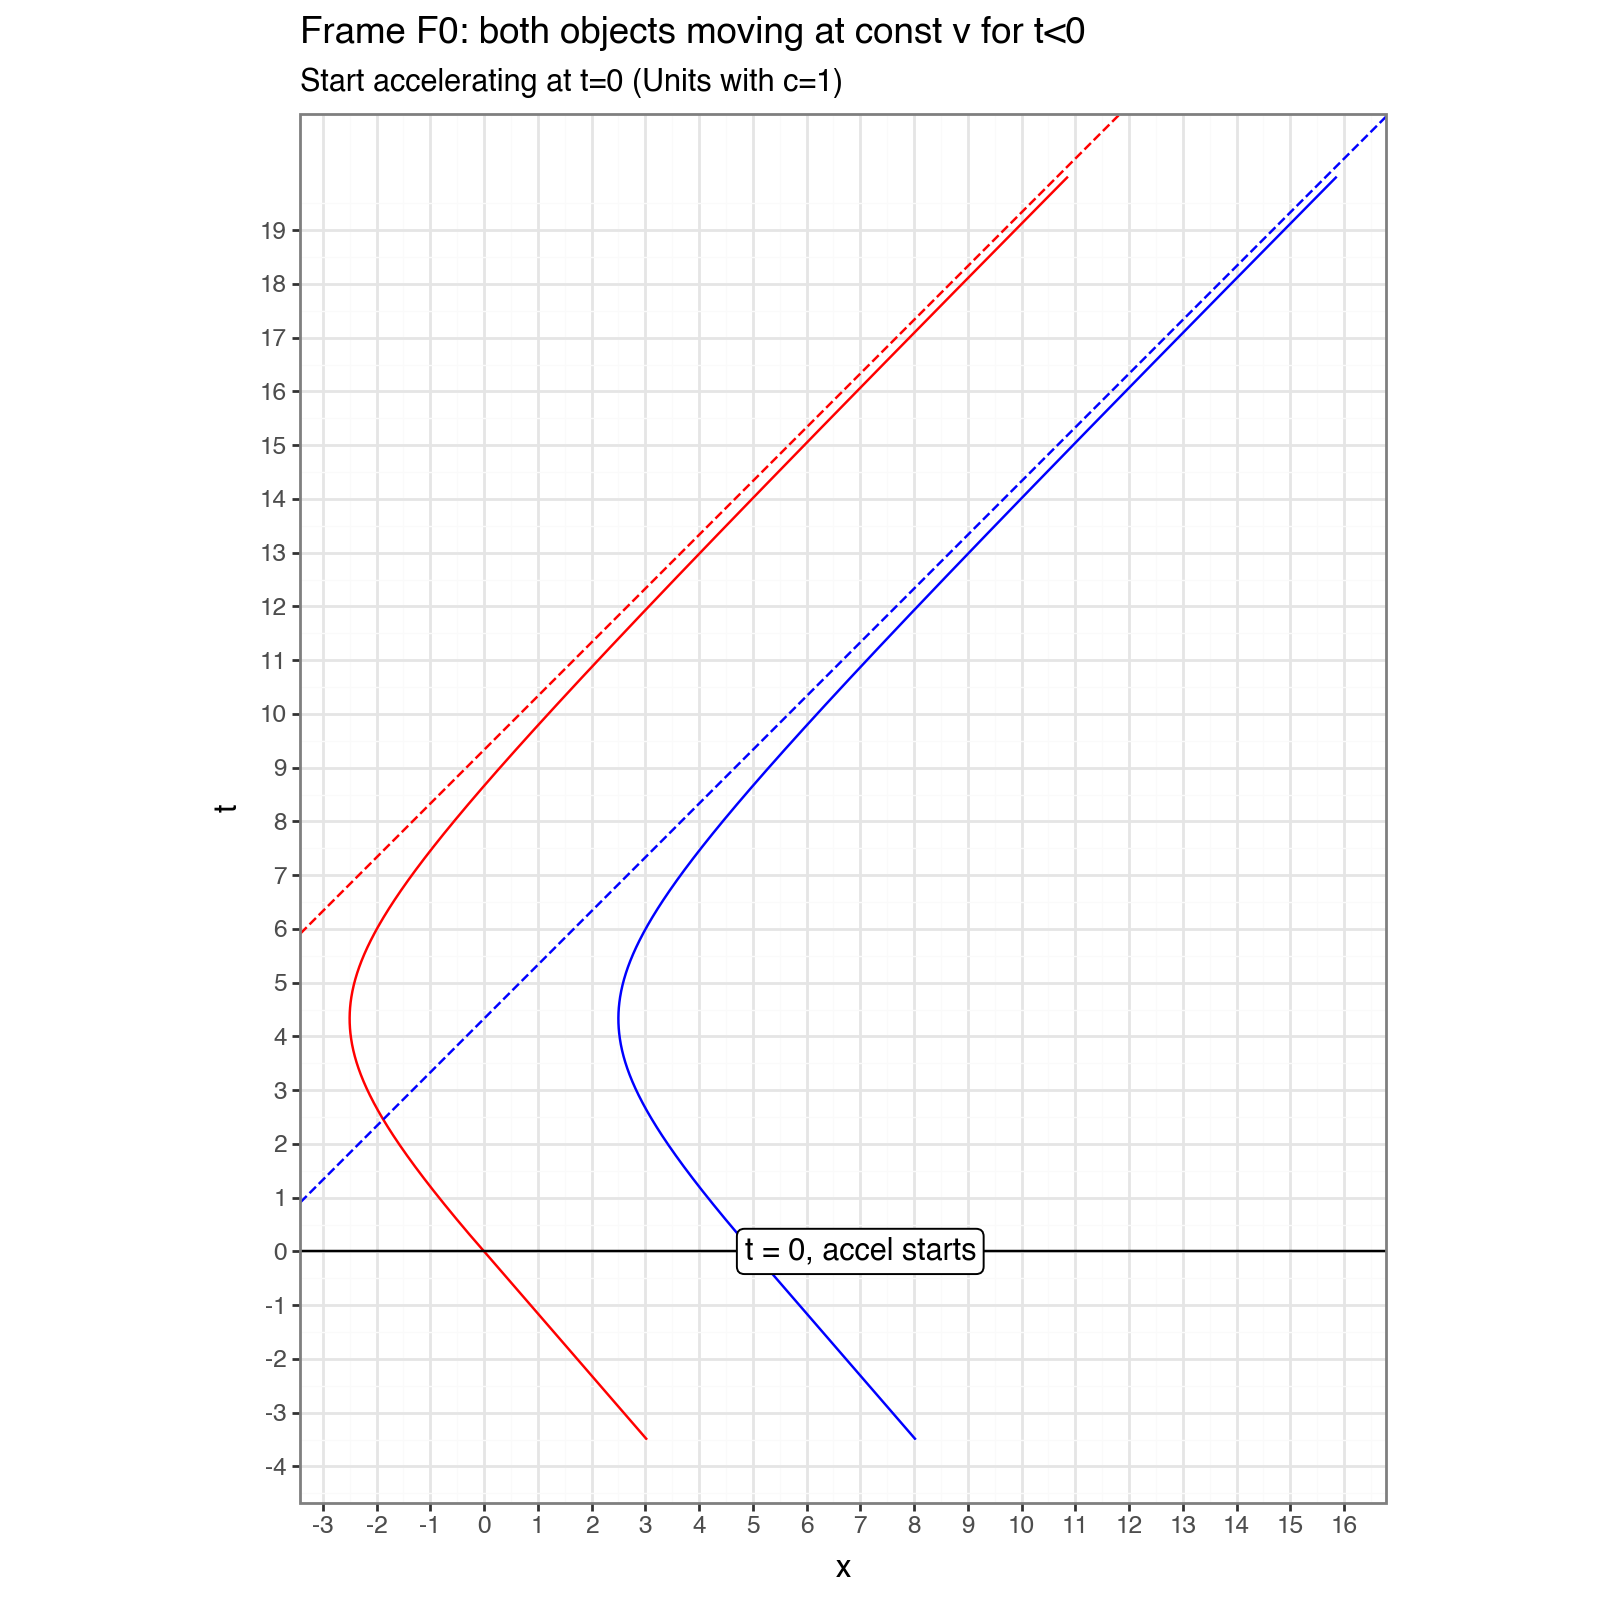

In [223]:
(
    p9.ggplot(p9.aes(x='x', y='t')) 
    + p9.geom_path(data=f0_a.query("x<20").query("t>=-4").query("t<20"), color='red')
    + p9.geom_path(data=f0_b.query("x<20").query("t>=-4").query("t<20"), color='blue')
    + p9.geom_abline(intercept=1/a*np.sqrt((1-v0)/(1+v0)), slope=1, color='red', linetype='dashed')
    + p9.geom_abline(intercept=-L_in_F0+1/a*np.sqrt((1-v0)/(1+v0)), slope=1, color='blue', linetype='dashed') 
    + p9.scale_x_continuous(breaks=range(-4,20))
    + p9.scale_y_continuous(breaks=range(-4,20))
    + p9.theme_bw()
    + p9.theme(figure_size=(8,8))  
    + p9.geom_hline(yintercept=0, color="black")
    + p9.annotate("label", x=7, y=0, label="t = 0, accel starts")
    + p9.labs(
        title="Frame F0: both objects moving at const v for t<0",
        subtitle="Start accelerating at t=0 (Units with c=1)",
    )
    + p9.coord_equal(ratio = 1) 
)

# Transform frame

In [224]:
f0_a = pd.concat([worldline_a, worldline_a_after])
f0_b = pd.concat([worldline_b, worldline_b_after])

In [225]:
f0_a

,t,x
0,-1000.000000,866.025404
1,-999.499750,865.592174
2,-998.999500,865.158945
3,-998.499250,864.725716
4,-997.998999,864.292487
...,...,...
4995,79.935995,70.647190
4996,79.951996,70.663182
4997,79.967998,70.679175
4998,79.983999,70.695167


In [226]:
f0_b

,t,x
0,-1000.000000,871.025404
1,-999.499750,870.592174
2,-998.999500,870.158945
3,-998.499250,869.725716
4,-997.998999,869.292487
...,...,...
4995,79.935995,75.647190
4996,79.951996,75.663182
4997,79.967998,75.679175
4998,79.983999,75.695167


In [227]:
def transform(worldline: pd.DataFrame, beta: float):
    gamma = np.sqrt(1/(1-beta*beta))
    print(gamma)
    x = worldline['x'].values
    t = worldline['t'].values
    t_prime = gamma*(t - beta * x)
    x_prime = gamma*(x - beta * t)
    return pd.DataFrame({'x': x_prime, 't': t_prime})

In [228]:
f1_a = transform(f0_a, beta=-np.sqrt(3)/2)
f1_b = transform(f0_b, beta=-np.sqrt(3)/2)

1.9999999999999996
1.9999999999999996


In [229]:
f1_a

,x,t
0,0.000000,-500.000000
1,0.000000,-499.749875
2,0.000000,-499.499750
3,0.000000,-499.249625
4,0.000000,-498.999500
...,...,...
6995,279.747584,282.236512
6996,279.807284,282.296214
6997,279.866984,282.355917
6998,279.926684,282.415619


In [230]:
f1_b

,x,t
0,10.000000,-491.339746
1,10.000000,-491.089621
2,10.000000,-490.839496
3,10.000000,-490.589371
4,10.000000,-490.339246
...,...,...
6995,289.747584,290.896766
6996,289.807284,290.956468
6997,289.866984,291.016171
6998,289.926684,291.075873


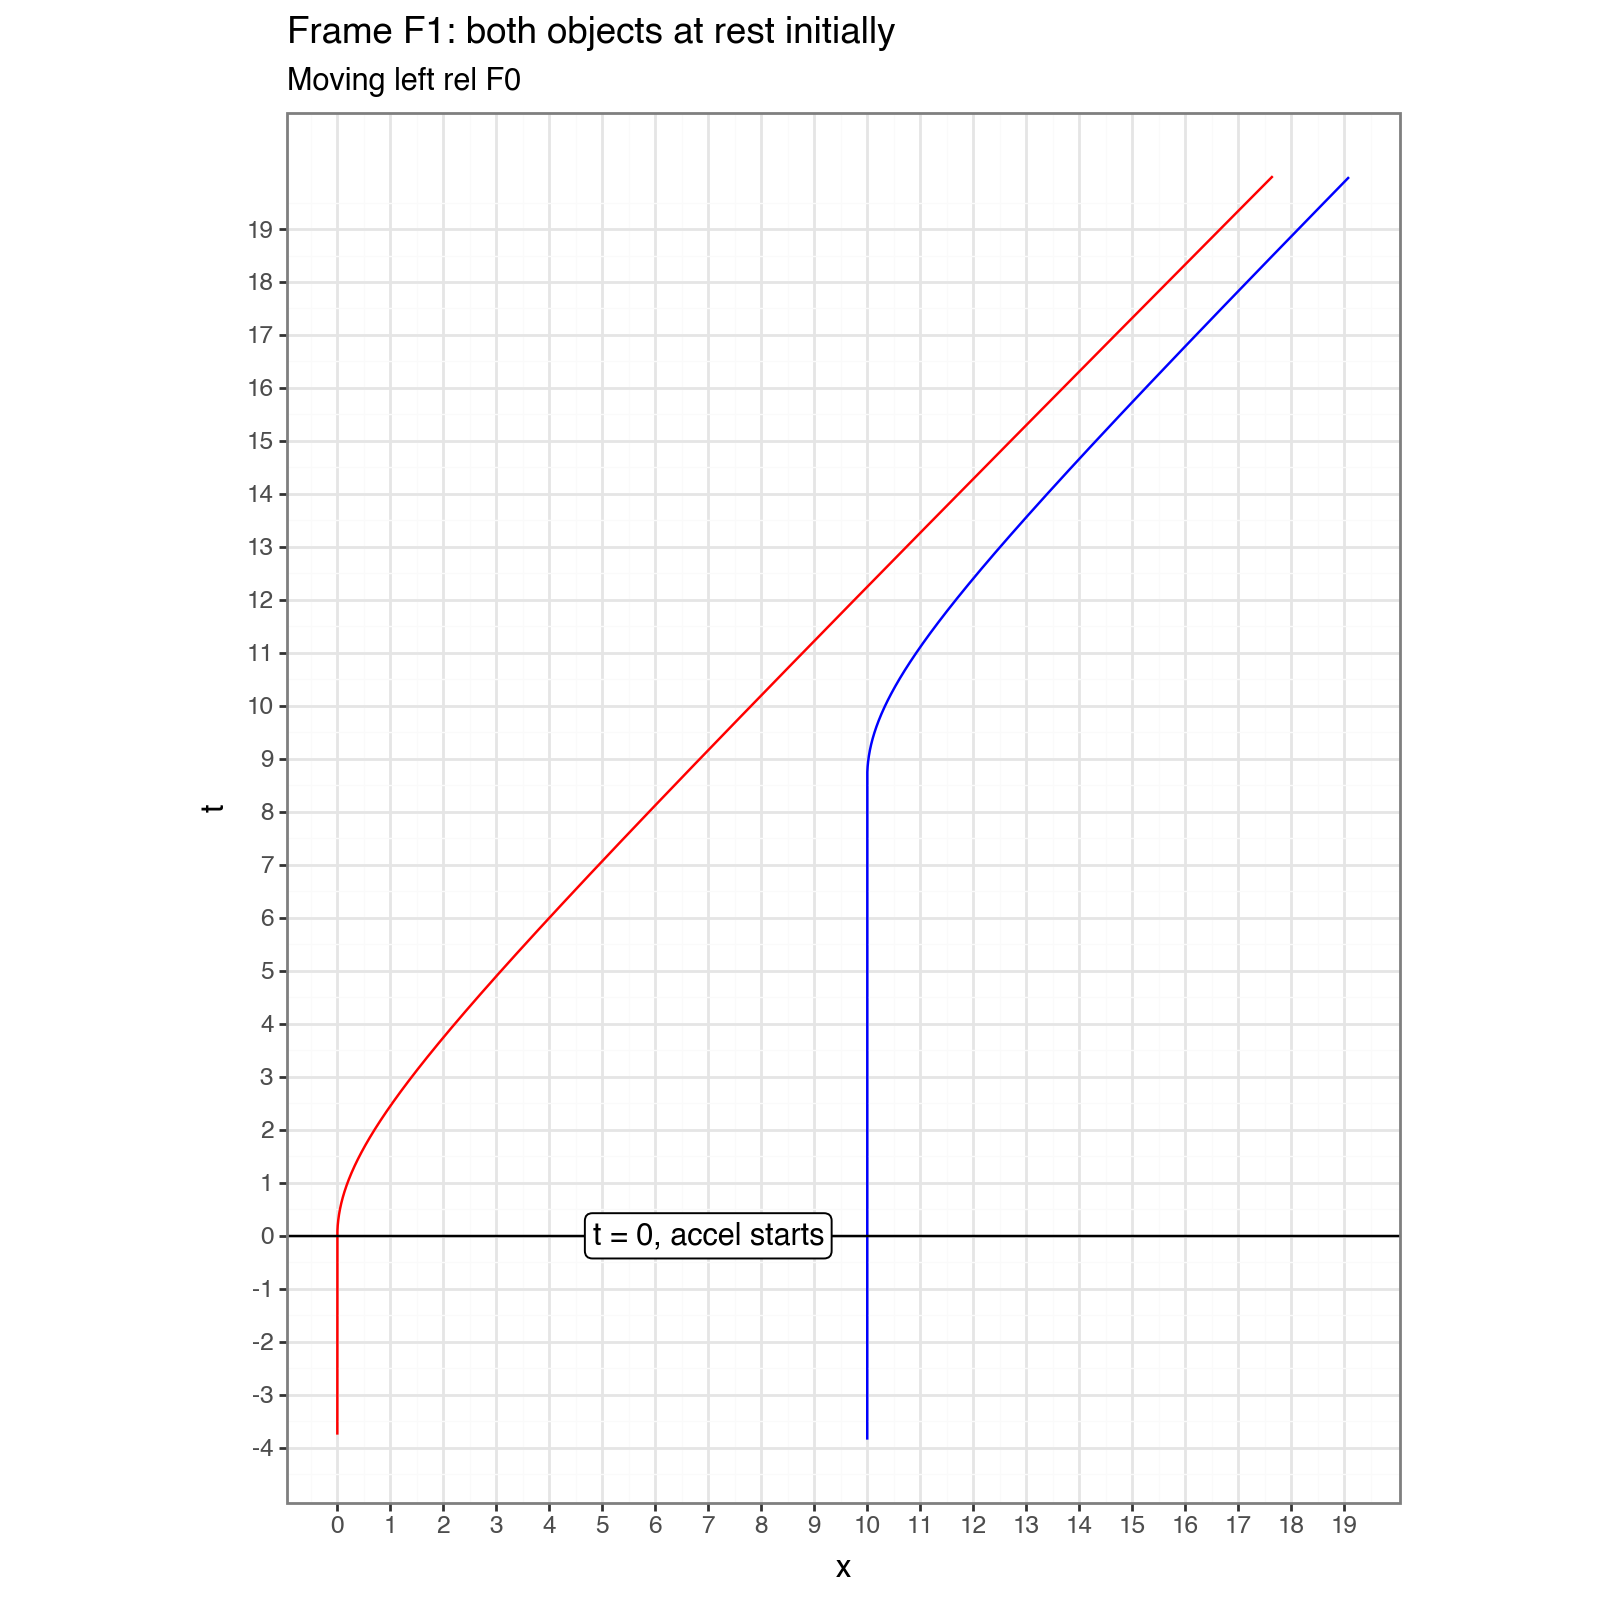

In [231]:
(
    p9.ggplot(p9.aes(x='x', y='t')) 
    + p9.geom_path(data=f1_a.query("x<20").query("t>=-4").query("t<20"), color='red')
    + p9.geom_path(data=f1_b.query("x<20").query("t>=-4").query("t<20"), color='blue')
    #+ p9.geom_abline(intercept=1/a*np.sqrt((1-v0)/(1+v0)), slope=1, color='red', linetype='dashed')
    #+ p9.geom_abline(intercept=-L_in_F0+1/a*np.sqrt((1-v0)/(1+v0)), slope=1, color='blue', linetype='dashed') 
    + p9.scale_x_continuous(breaks=range(-4,20))
    + p9.scale_y_continuous(breaks=range(-4,20))
    + p9.theme_bw()
    + p9.theme(figure_size=(8,8))  
    + p9.geom_hline(yintercept=0, color="black")
    + p9.annotate("label", x=7, y=0, label="t = 0, accel starts")
    + p9.labs(
        title="Frame F1: both objects at rest initially",
        subtitle="Moving left rel F0",
    )
    + p9.coord_equal(ratio = 1) 
)

In [232]:
f2_a = transform(f0_a, beta=+np.sqrt(3)/2)
f2_b = transform(f0_b, beta=+np.sqrt(3)/2)

1.9999999999999996
1.9999999999999996


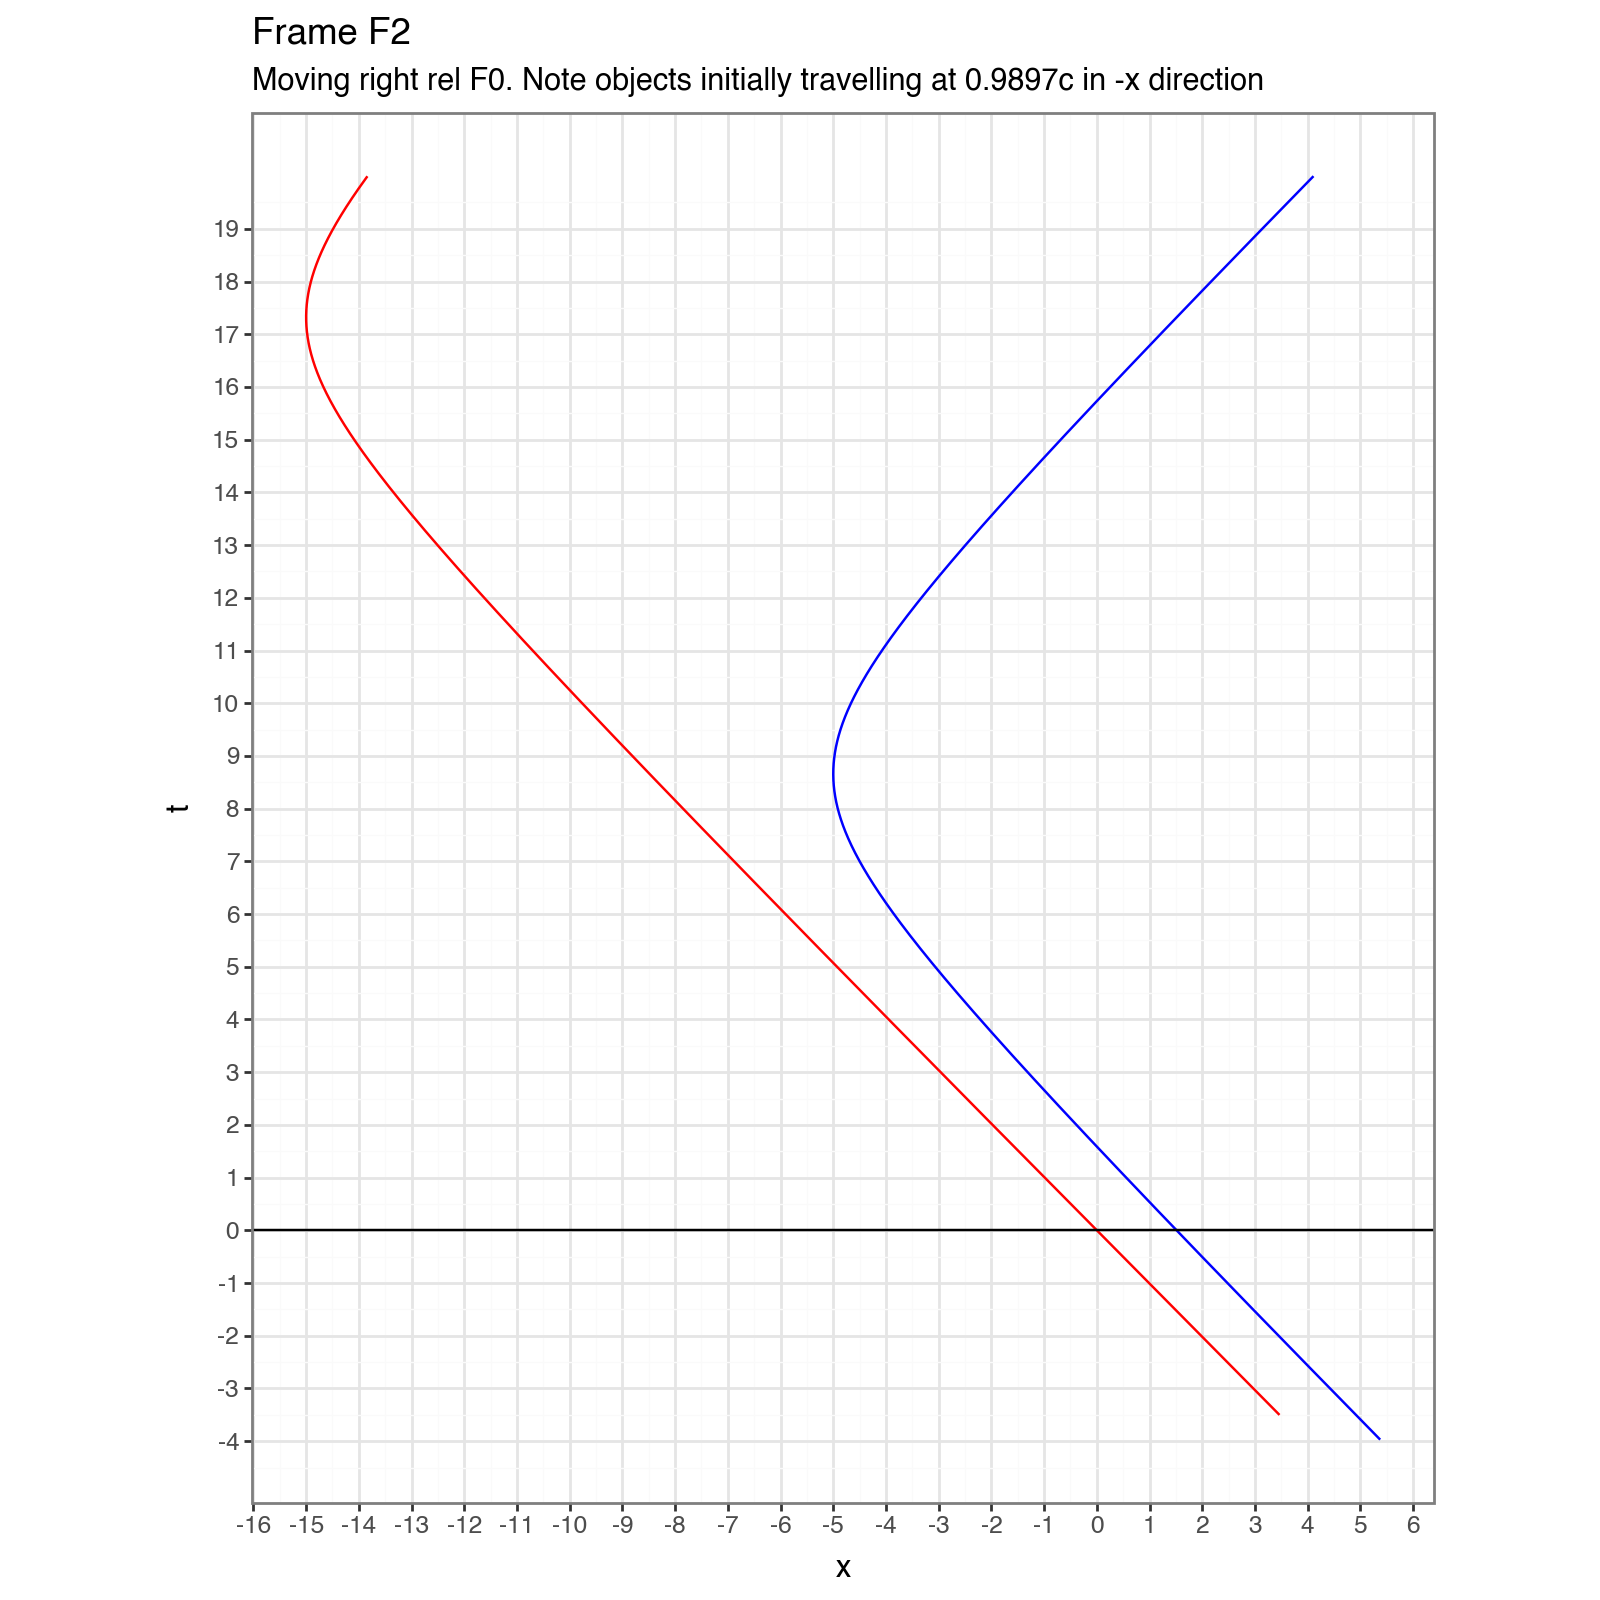

In [ ]:
(
    p9.ggplot(p9.aes(x='x', y='t')) 
    + p9.geom_path(data=f2_a.query("x<20").query("t>=-4").query("t<20"), color='red')
    + p9.geom_path(data=f2_b.query("x<20").query("t>=-4").query("t<20"), color='blue')
    #+ p9.geom_abline(intercept=1/a*np.sqrt((1-v0)/(1+v0)), slope=1, color='red', linetype='dashed')
    #+ p9.geom_abline(intercept=-L_in_F0+1/a*np.sqrt((1-v0)/(1+v0)), slope=1, color='blue', linetype='dashed') 
    + p9.scale_x_continuous(breaks=range(-20,20))
    + p9.scale_y_continuous(breaks=range(-4,20))
    + p9.theme_bw()
    + p9.theme(figure_size=(8,8))  
    + p9.geom_hline(yintercept=0, color="black")
    #+ p9.annotate("label", x=7, y=0, label="t = 0, accel starts")
    + p9.labs(
        title="Frame F2",
        subtitle="Moving right rel F0. Note objects initially travelling at 0.9897c in -x direction",
    )
    + p9.coord_equal(ratio = 1) 
)

## Explain length contraction

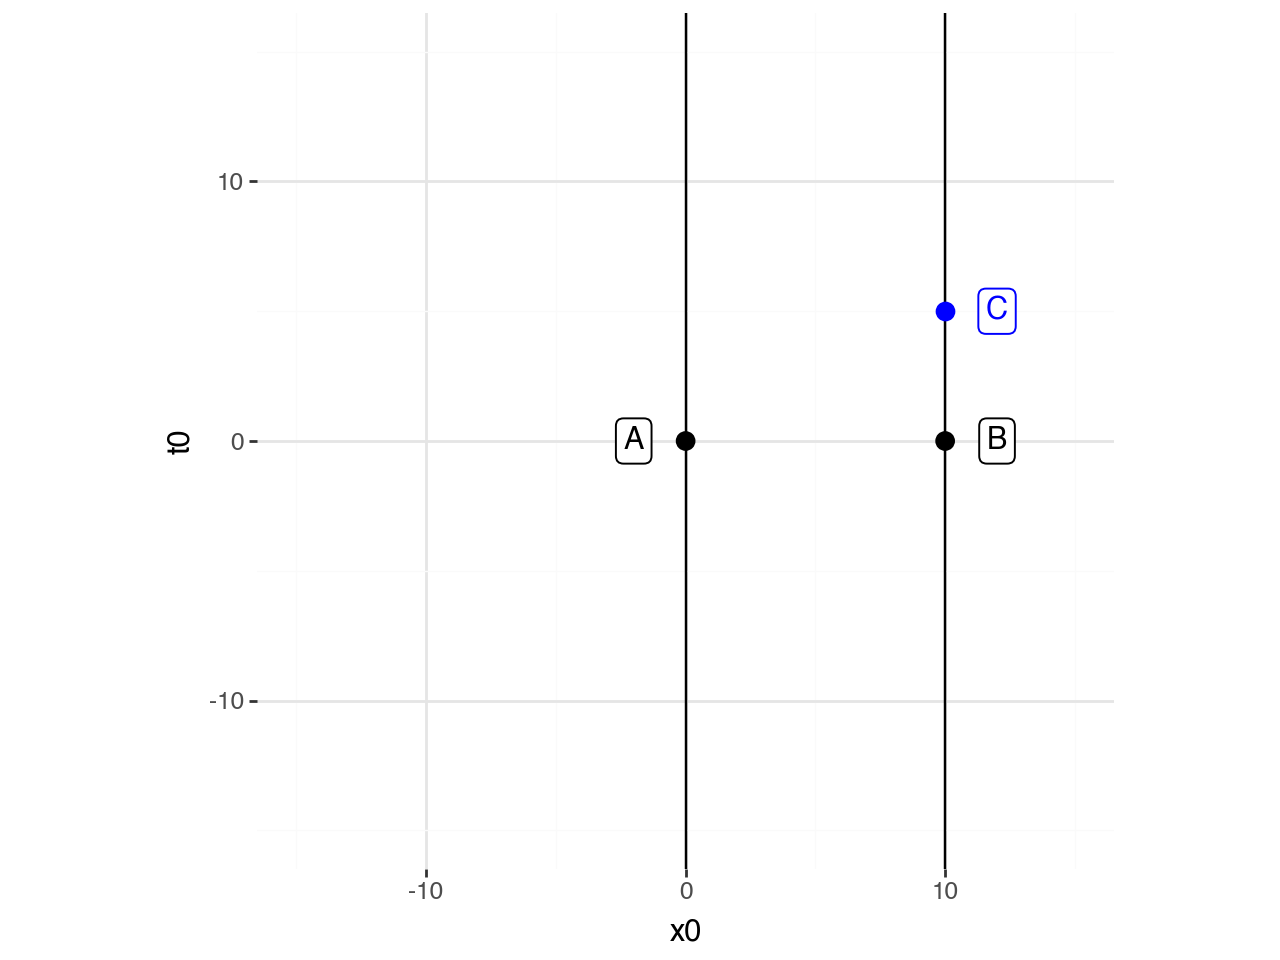

In [262]:
(
    p9.ggplot(p9.aes(x='x0', y='t0'))
    + p9.geom_vline(xintercept=0)
    + p9.geom_vline(xintercept=10)
    + p9.theme_bw()
    + p9.theme(panel_border=p9.element_blank())
    + p9.xlim(-15, 15)
    + p9.ylim(-15, 15)
    + p9.geom_point(data=pd.DataFrame([{'x0':0 ,'t0':0}, {'x0':10, 't0':0}]),size=3)
    + p9.geom_point(data=pd.DataFrame([{'x0':10 ,'t0':5}]),size=3, color='blue')
    + p9.annotate('label', x=-2, y=0, label="A")
    + p9.annotate('label', x=12, y=0, label='B')
    + p9.annotate('label', x=12, y=5, label='C', color='blue')
    + p9.coord_equal(ratio = 1) 
)

(
    p9.geom_plot(p9.aes(x='x', t='t'))
    + p9.geom_vline(xintercept=0)
    + p9.geom_vline(xintercept=10)
)

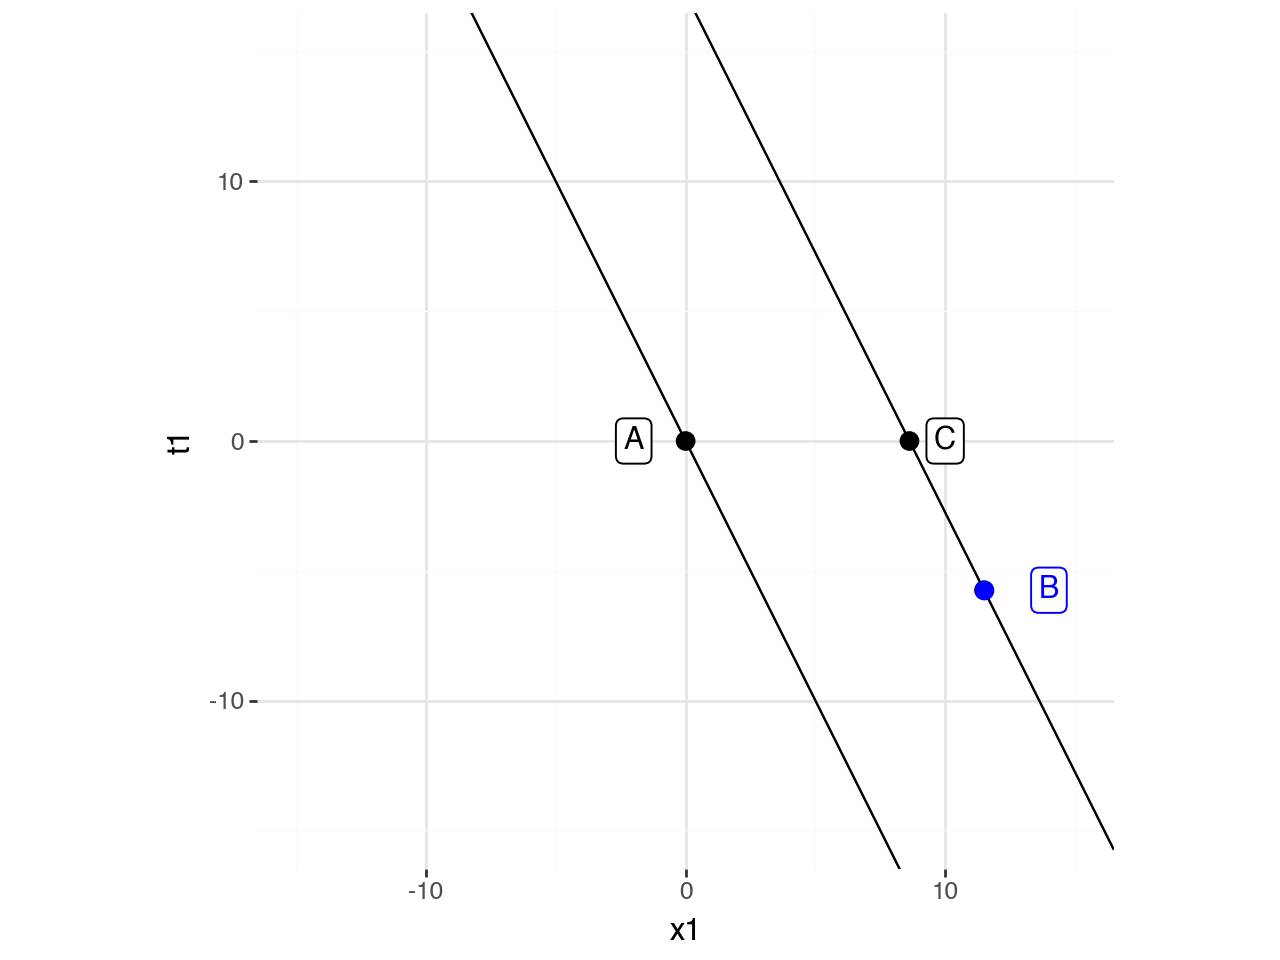

In [275]:
(
    p9.ggplot(p9.aes(x='x1', y='t1'))
    + p9.geom_abline(intercept=0, slope=-2)
    + p9.geom_abline(intercept=17.25, slope=-2)
    + p9.theme_bw()
    + p9.theme(panel_border=p9.element_blank())
    + p9.xlim(-15, 15)
    + p9.ylim(-15, 15)
    + p9.geom_point(data=pd.DataFrame([{'x1':0 ,'t1':0}, {'x1':8.625 ,'t1':0}, {'x1':11.5, 't1':-5.75}]),size=3)
    + p9.geom_point(data=pd.DataFrame([{'x1':11.5, 't1':-5.75}]),size=3, color='blue')
    + p9.annotate('label', x=-2, y=0, label="A")
    + p9.annotate('label', x=14, y=-5.75, label='B', color='blue')
    + p9.annotate('label', x=10, y=0, label='C', color='black')
    + p9.coord_equal(ratio = 1) 
)